### 유방암 데이터를 활용하여 Ensemble 모델을 학습해보자
- wisconsin의 유방암 데이터 셋
- 총 569건 데이터
- 악성(212건), 양성(357)으로 구성

In [1]:
# 데이터 셋 불러오기
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [2]:
# 딕셔너리 구조에서 데이터 확인 : 키 값들을 확인 keys()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
# 분류에 사용할 특성 확인
# 학습에 사용할 데이터의 이름과 개수 확인
print(data.feature_names)
print(len(data.feature_names))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
30


In [4]:
# 각 특성들의 자료형 확인
type(data.data)

numpy.ndarray

In [5]:
# 유방암 데이터 셋의 크기 확인
data.data.shape

(569, 30)

In [6]:
# 양성과 악성의 데이터 수 확인
# 동일한 개수로 이루어진 2개 이상의 데이터를 연결하는 함수 : zip()
# zip() ==> 양성 : 00명 악성 : 00명
# 정답 레이블(클래스)의 이름 : target_names 양성 or 악성
# 양성, 악성의 수 --> 범주별로 갯수 반환 : bincount()
import numpy as np
for i,j in zip(data.target_names, np.bincount(data.target)):
    print({i : j})

{'malignant': 212}
{'benign': 357}


In [7]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

### 훈련세트와 테스트세트로 분리

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test, y_train, y_test = train_test_split(data.data,  # X 값
                                                   data.target,  # y 값
                                                   test_size=0.3,
                                                   random_state=100
                                                  )

In [11]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

### RandomForest 모델 적용하기
- 1. 몇개의 트리를 만들지 선택
- 2. 단일 결정트리 처럼 사전 가지치기 사용 여부 결정

In [12]:
# 필요한 도구 꺼내오기
from sklearn.ensemble import RandomForestClassifier

# RandomForest 모델 생성, 하이퍼 파라미터 설정
forest_model = RandomForestClassifier(n_estimators=80, random_state=100)

# 학습
forest_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=80, random_state=100)

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(forest_model, X_train, y_train, cv=5).mean()

0.954778481012658

In [14]:
# 학습 및 테스트 데이터를 이용해서 예측값 만들기
train_pre = forest_model.predict(X_train)
test_pre = forest_model.predict(X_test)

# 예측 결과 확인
print('학습 데이터를 이용한 예측 결과 : ', train_pre)
print('학습 데이터를 이용한 예측 결과 : ', test_pre)

학습 데이터를 이용한 예측 결과 :  [0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0
 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0
 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1
 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1
 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1
 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0
 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1
 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1]
학습 데이터를 이용한 예측 결과 :  [0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0


In [15]:
# 학습 및 테스트 데이터에 대한 분류 모델의 성능 확인 --> 평균 정확도
from sklearn.metrics import accuracy_score

print('학습데이터 정확도 : {:.3f}'.format(accuracy_score(y_train, train_pre)))
print('테스트데이터 정확도 : {:.3f}'.format(accuracy_score(y_test, test_pre)))


학습데이터 정확도 : 1.000
테스트데이터 정확도 : 0.953


### GridSearchCV를 적용하여 하이퍼 파라미어 튜닝

In [16]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 설정
# n_estimators : [50, 80, 130]
# max_depth : [3, 5, 7]
# max_leaf_nodes : [2, 4, 6]
# min_samples_split : [3, 5, 7]

param = {
    'n_estimators' : [50, 80, 130],
    'max_depth' : [3, 5, 7],
    'max_leaf_nodes' : [2, 4, 6],
    'min_samples_split' : [3, 5, 7]
}

forest_model2 = RandomForestClassifier(random_state=1, n_jobs=-1)
# n_jobs = -1  : 내 컴퓨터의 CPU 성능을 모두 사용

grid = GridSearchCV(forest_model2, param, cv=5)

In [17]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=1),
             param_grid={'max_depth': [3, 5, 7], 'max_leaf_nodes': [2, 4, 6],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': [50, 80, 130]})

In [20]:
grid.best_params_

{'max_depth': 5,
 'max_leaf_nodes': 6,
 'min_samples_split': 5,
 'n_estimators': 80}

In [19]:
grid.best_score_

0.952246835443038

### 모델 완성 및 영향력 높은 특성 확인

In [21]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# Random Forest 모델 완성하기
best_model = RandomForestClassifier(max_depth= 5,
                                    max_leaf_nodes= 6,
                                    min_samples_split = 5,
                                    n_estimators= 80,
                                    random_state=1)
# 학습
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=6, min_samples_split=5,
                       n_estimators=80, random_state=1)

In [27]:
# feature_importances_ 를 이용해서 영향력이 높은 모델의 특성을 추출하기
fi = best_model.feature_importances_
print('[feature] \n',fi)

[feature] 
 [0.05728766 0.01312087 0.05847654 0.0550743  0.00337323 0.00419892
 0.06278083 0.10764065 0.00036933 0.00215615 0.02076337 0.0002662
 0.00493794 0.03514797 0.00129405 0.00241678 0.00529324 0.0050417
 0.00107757 0.00127097 0.09105803 0.01114966 0.14230934 0.11310657
 0.00552624 0.01349231 0.0340516  0.13127133 0.00811303 0.00793362]


In [34]:
# 영향력 높은 모델의 특성의 형태를 데이터 프레임으로 생성하기
# 행 : 특성명, 열 : 특성의 중요도 값
df1 = pd.DataFrame(fi, index=data.feature_names, columns=['importances'])
df1 = df1.sort_values(by='importances', ascending=False) # 특성의 중요도를 내림차순 정렬

<Axes: >

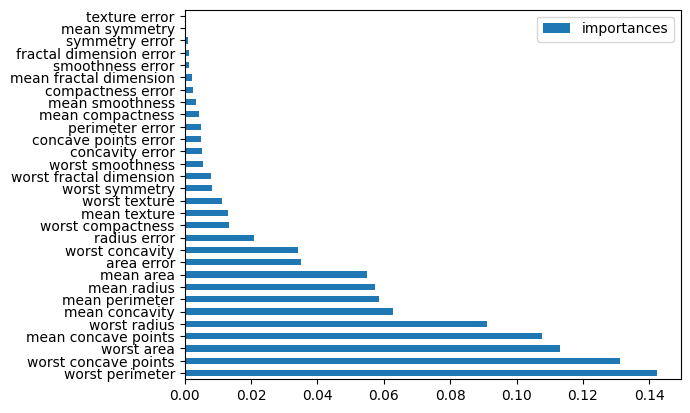

In [35]:
# 데이터 프레임의 값을 시각화 : bar 차트 - 수평 bar 차트 barh()
df1.plot.barh()

### AdaBoost(Adaptive Boosting) 모델 적용
- 결정트리 기반이지만 랜덤 포레스트처럼 각각의 트리들이 독립적으로 존재하지 않음
- 사전 가지치기 파라미터를 사용할 수없음(max_depth 등)
- learning_rate(학습률) : 가중치 갱신의 변동폭을 조정하는 값, 0 ~ 1
    - 값이 클수록 : 과대적합, 값이 작을수록 : 과소적합

In [37]:
# AdaBoost 모델 불러오기
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost 모델 생성, 하이퍼 파라미터 튜닝
ada_model = AdaBoostClassifier(n_estimators=80, random_state=1)

# 학습
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=80, random_state=1)

### GBM(Gradient Boosting Machine) 모델 적용
- 여러개의 결정트리를 묶어서 강력한 모델을 만드는 앙상블 방법
- 강력한 사전 가지치기를 적용
- 예측 성능은 높지만 시간이 오래걸리고 과대적합이 빠르게 된다는 단점이 있음
- max_depth를 작게 설정 하는게 좋음(5이하)

In [38]:
# GBM 모델 불러오기
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier()

In [39]:
gbm_model.fit(X_train, y_train)

GradientBoostingClassifier()

### XGBoost 모델 적용하기
- 결정트리 기반의 앙상블 모델에서 가장 각광받고있는 알고리즘(모델)중 하나
- 분류에 있어서 일반적으로 다른 머신머닝 모델보다 뛰어난 성능을 나타냄
- GBM을 기반으로 하지만, 느린 학습시간 해결 -> Early stopping 기능
-                         과대적합의 문제를 해결 --> 규제 포함
- 대규모 머신러닝 문제에 GBM을 적용하려면 XGBoost를 사용

In [40]:
!pip install xgboost

                                              0.0/70.9 MB ? eta -:--:--
                                              0.0/70.9 MB ? eta -:--:--
                                             0.0/70.9 MB 393.8 kB/s eta 0:03:01
                                              0.2/70.9 MB 1.5 MB/s eta 0:00:47
                                              0.7/70.9 MB 3.7 MB/s eta 0:00:20
                                              1.2/70.9 MB 5.2 MB/s eta 0:00:14
                                              1.4/70.9 MB 5.0 MB/s eta 0:00:14
     -                                        2.2/70.9 MB 6.6 MB/s eta 0:00:11
     -                                        2.7/70.9 MB 7.2 MB/s eta 0:00:10
     -                                        3.3/70.9 MB 7.8 MB/s eta 0:00:09
     --                                       3.6/70.9 MB 8.0 MB/s eta 0:00:09
     --                                       4.4/70.9 MB 8.5 MB/s eta 0:00:08
     --                                       4.9/70.9 MB 8.7 MB/

In [41]:
# 모델 불러오기
from xgboost import XGBClassifier

# XGBoost 모델 생성
xgb_model = XGBClassifier()

# 학습
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### Light GBM 모델 적용하기
- XGBoost에 비해 가벼워 속도가 빠른 모델
- 일반적인 GBM은 균형트리분할 -> 수평
    -과대적합에 강한 구조 이기 때문에 균형을 맞추는데 시간이 필요(트리의 깊이를 최소화 해야함)
- Light GBM은 비대칭 트리분할 -> 수직
- 학습을 반복할수록 균형트리보다 예측 오류 손실이 최소화

In [42]:
!pip install lightgbm

                                              0.0/1.3 MB ? eta -:--:--
                                              0.0/1.3 MB ? eta -:--:--
     -                                        0.0/1.3 MB 667.8 kB/s eta 0:00:02
     ------------                             0.4/1.3 MB 3.8 MB/s eta 0:00:01
     -----------------------------            1.0/1.3 MB 6.2 MB/s eta 0:00:01
     ---------------------------------------- 1.3/1.3 MB 6.9 MB/s eta 0:00:00


In [43]:
from lightgbm.sklearn import LGBMClassifier

In [44]:
# 모델 생성
lgbm_model = LGBMClassifier()

In [45]:
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 255, number of negative: 143
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000362 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3978
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.640704 -> initscore=0.578419
[LightGBM] [Info] Start training from score 0.578419
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

LGBMClassifier()